In [1]:
import pandas as pd 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']= 250
sns.set_style('darkgrid')

In [3]:
#Plot the data

df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/AirPassengers.csv', index_col=0, parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


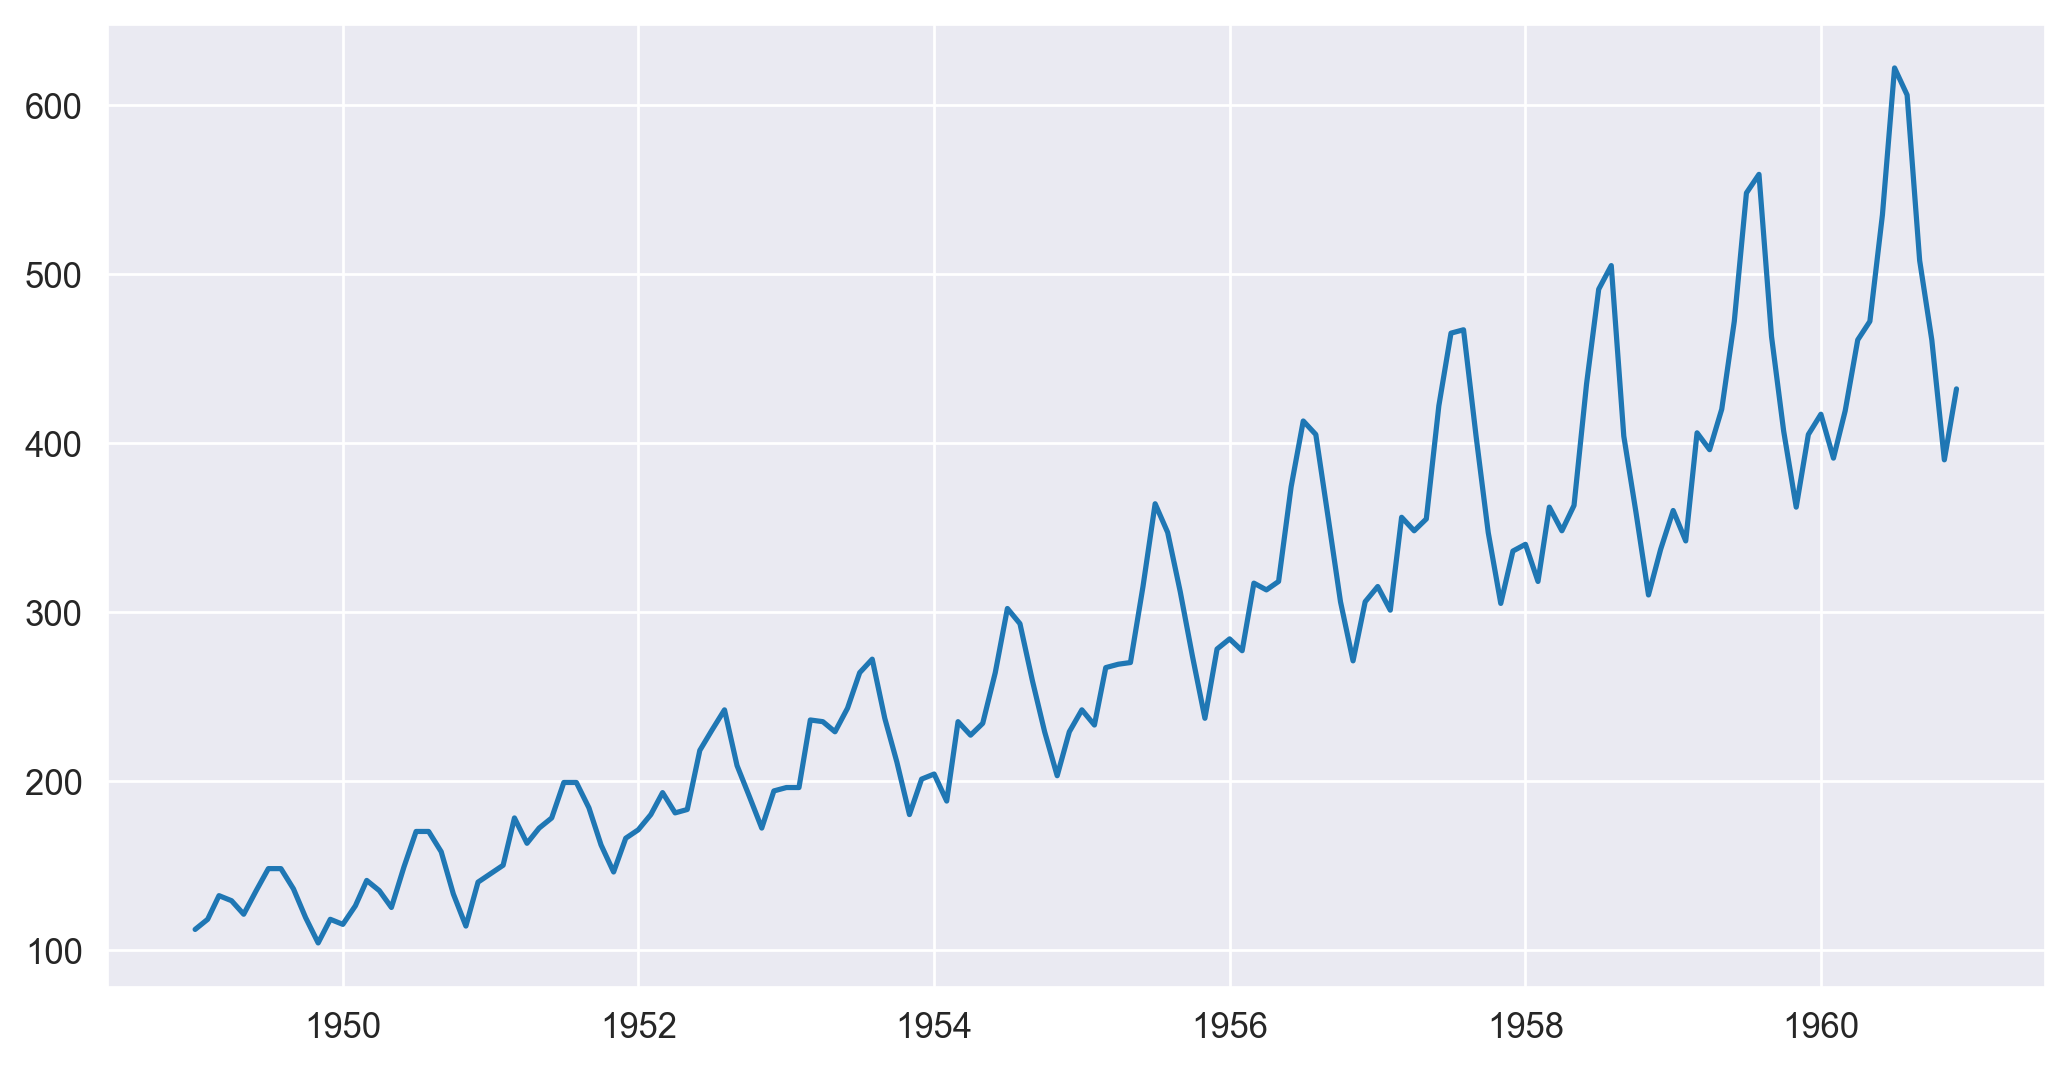

In [5]:
plt.plot(df['Passengers'])

In [6]:
# Calculating first order difference

df['First-Order'] = df['Passengers'].diff(periods=1)
df

,Passengers,First-Order
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [7]:
# Drop na

df.dropna(inplace=True)
df

,Passengers,First-Order
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


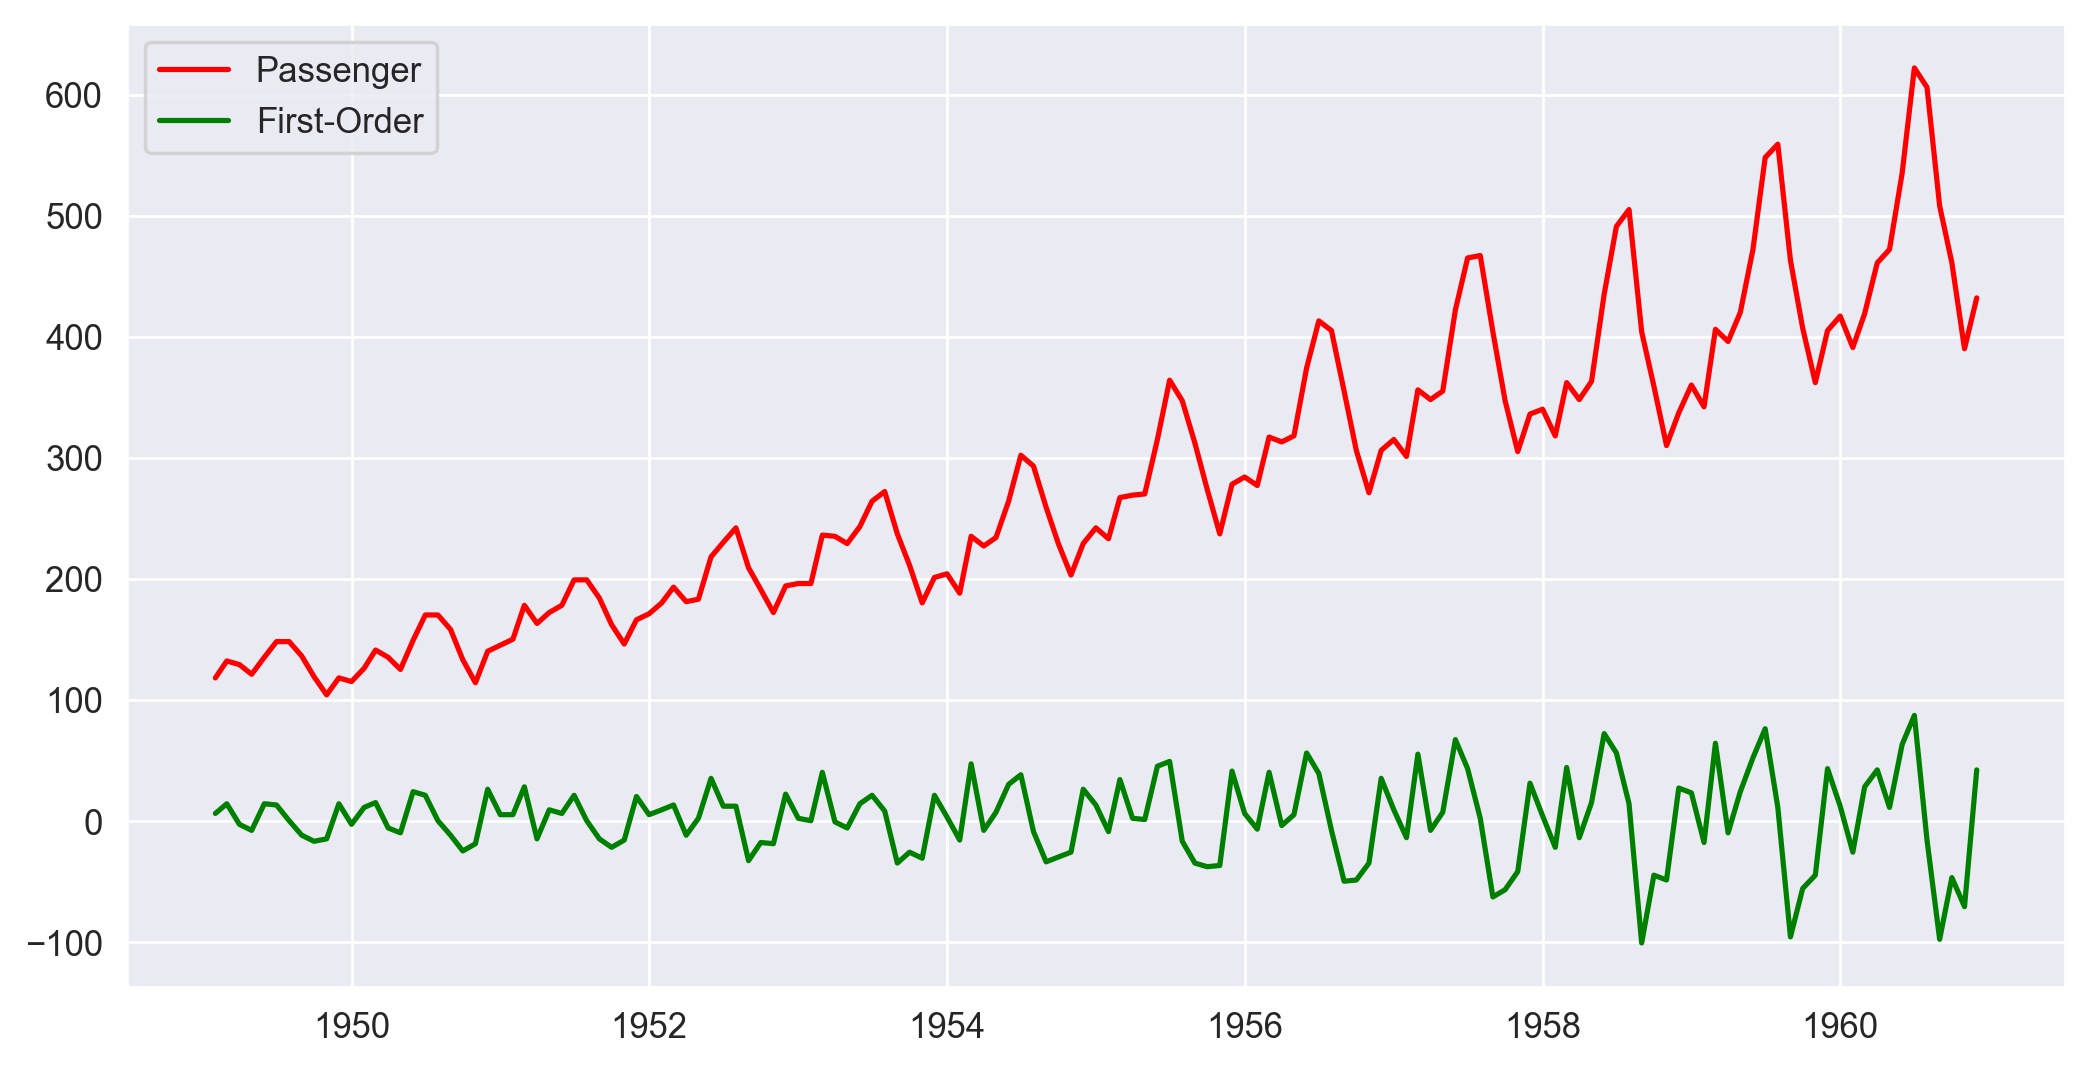

In [8]:
#Plot 

plt.plot(df['Passengers'], color='r', label = 'Passenger')
plt.plot(df['First-Order'], color = 'green', label= 'First-Order')
plt.legend()



In [9]:
#Calculate Autocorrelation 

acf_values = acf(df['First-Order'])
acf_values

array([ 1.        ,  0.30285526, -0.10214755, -0.24127349, -0.30040158,
       -0.09407271, -0.07844257, -0.0923622 , -0.29480158, -0.19177821,
       -0.10491707,  0.28293105,  0.82917786,  0.28450079, -0.10575172,
       -0.22213093, -0.23107603, -0.06227904, -0.06618505, -0.09039973,
       -0.29710958, -0.16273198])

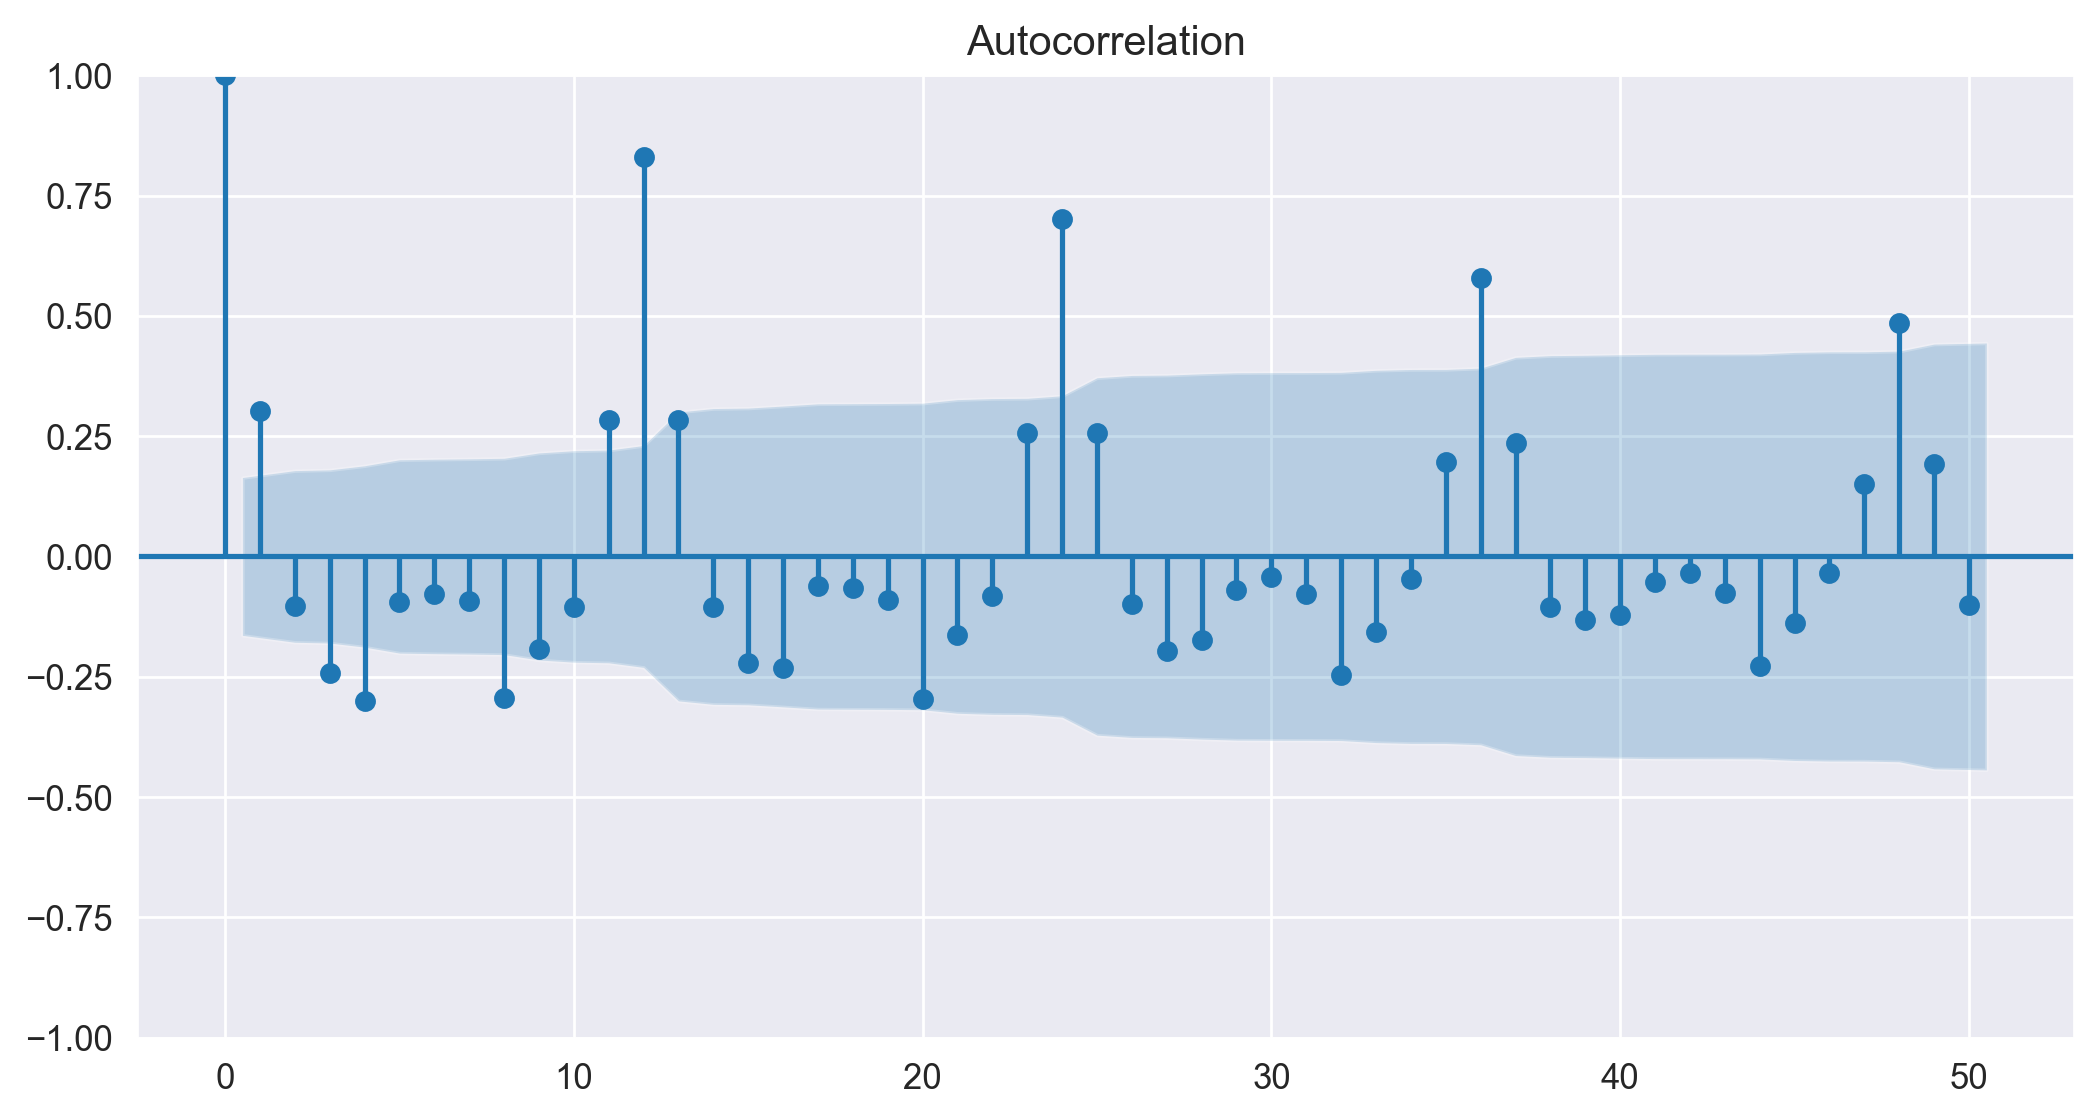

In [15]:
# Plot ACF

plot_acf(df['First-Order'], lags=50);

In [20]:
#Calculate PACF

pacf_val = pacf(df['First-Order'])
pacf_val

array([ 1.        ,  0.30498804, -0.21677838, -0.16414895, -0.22880726,
        0.0102048 , -0.20039114, -0.16381118, -0.4908729 , -0.27906007,
       -0.67292181, -0.41858338,  0.60762779, -0.05342571, -0.30073394,
        0.02024145,  0.13861772,  0.09074817, -0.12191529,  0.01046262,
       -0.21763101, -0.12181244])

/Users/apekshayeotkar/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


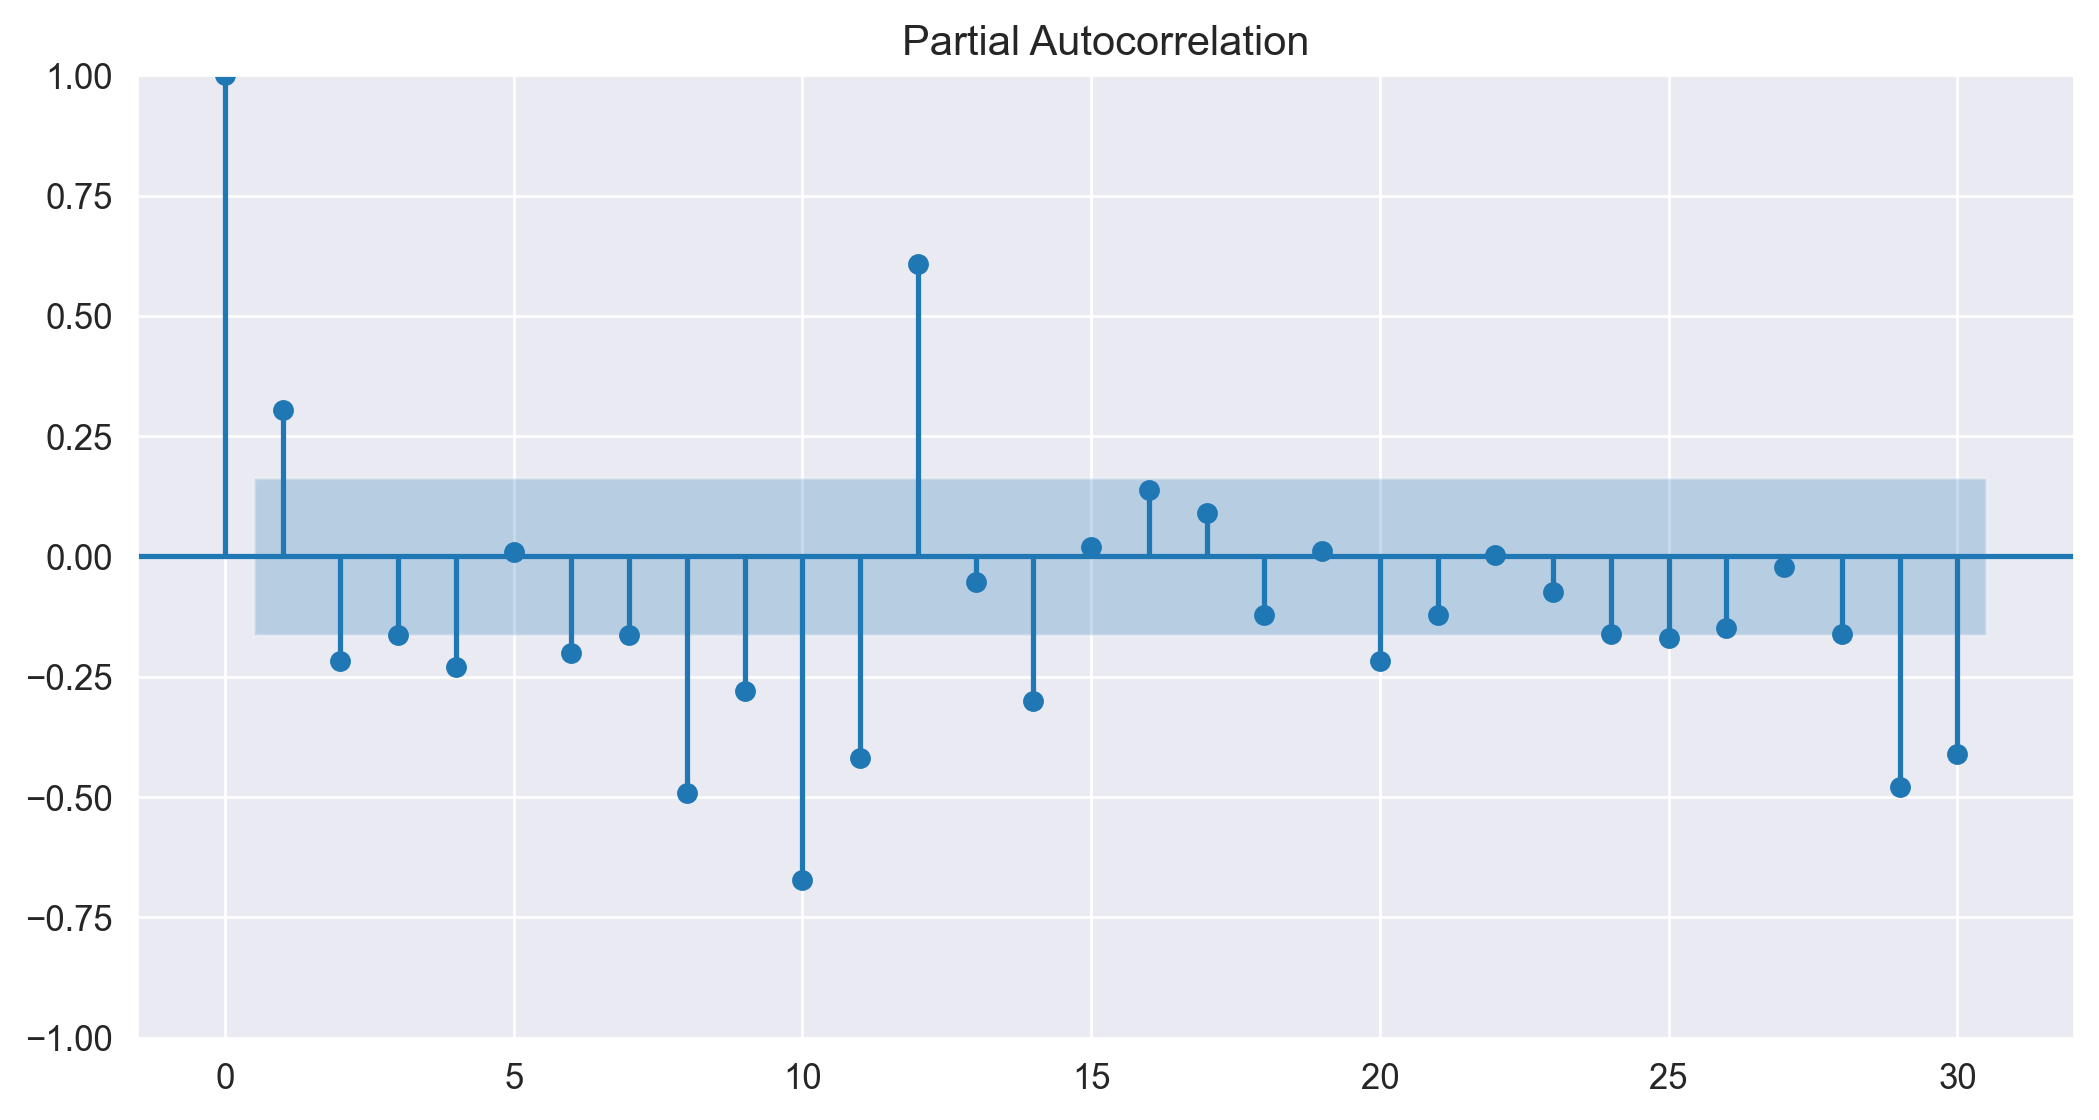

In [21]:
# Plot PACF
plot_pacf(df['First-Order'], lags=30);